In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation packages
from sklearn.preprocessing import StandardScaler

# Clustering packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



C:\Users\vivie\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
file_path = "https://raw.githubusercontent.com/MiliCod/Insights-Unveiled-A-Data-Driven-Exploration-of-Student-Stress-Factors/main/StressLevelDataset.csv"
df=pd.read_csv(file_path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
parametre1='noise_level'
parametre2="living_conditions"
parametre3='safety'
parametre4='basic_needs'

dfa=df[[parametre1,parametre2,parametre3,parametre4]]
dfa



,noise_level,living_conditions,safety,basic_needs
0,2,3,3,2
1,3,1,2,2
2,2,2,3,2
3,4,2,2,2
4,3,2,4,3
...,...,...,...,...
1095,2,2,2,3
1096,0,1,3,4
1097,2,3,4,4
1098,3,1,1,1


In [4]:
#center and reduce our data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dfa)
x_scaled

array([[-0.48894889,  0.43069508,  0.18692374, -0.53919641],
       [ 0.26433372, -1.35709581, -0.5245507 , -0.53919641],
       [-0.48894889, -0.46320037,  0.18692374, -0.53919641],
       ...,
       [-0.48894889,  0.43069508,  0.89839818,  0.85637077],
       [ 0.26433372, -1.35709581, -1.23602514, -1.23698   ],
       [ 0.26433372, -2.25099126,  0.89839818,  0.15858718]])

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\vivie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[4400.0,
 2230.837067845483,
 1668.032911113652,
 1449.898476422245,
 1346.8317098281007,
 1224.790730987331,
 1138.3725481686502,
 1067.6396243960303,
 1012.5421472268567,
 1014.1838837679011]

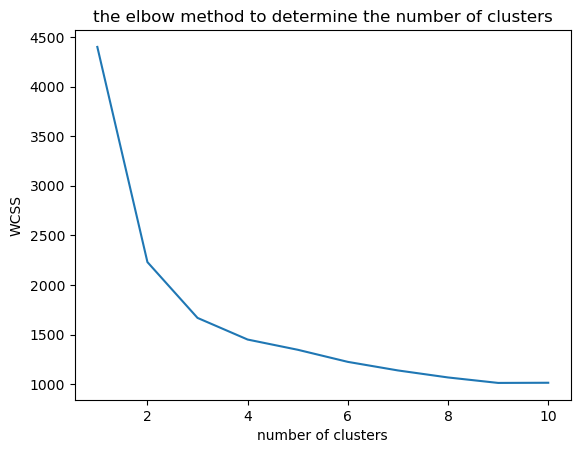

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('the elbow method to determine the number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans_etats = KMeans(n_clusters=3, init = 'k-means++')


In [8]:
kmeans_etats.fit(x_scaled)


KMeans(n_clusters=3)

In [9]:
clusters = kmeans_etats.predict(x_scaled)


In [10]:
dfa['cluster']=clusters
dfa

C:\Users\vivie\AppData\Local\Temp\ipykernel_2628\2827658313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=clusters


,noise_level,living_conditions,safety,basic_needs,cluster
0,2,3,3,2,2
1,3,1,2,2,1
2,2,2,3,2,2
3,4,2,2,2,1
4,3,2,4,3,2
...,...,...,...,...,...
1095,2,2,2,3,2
1096,0,1,3,4,2
1097,2,3,4,4,0
1098,3,1,1,1,1


In [11]:
dfa_clusters = dfa.groupby(['cluster']).median().round(0)  
dfa_clusters

,noise_level,living_conditions,safety,basic_needs
cluster,,,,
0,1.0,4.0,4.0,5.0
1,4.0,1.0,2.0,2.0
2,3.0,3.0,2.0,2.0


In [12]:
for i in range(4):
    print(f'Cluster {i}')
    print(dfa[dfa.cluster == i].index.tolist())
    print()

Cluster 0
[6, 12, 14, 16, 17, 20, 22, 25, 30, 31, 34, 37, 39, 40, 41, 42, 45, 47, 49, 50, 52, 57, 58, 59, 60, 61, 62, 65, 70, 72, 73, 77, 80, 83, 98, 104, 105, 107, 110, 112, 114, 120, 122, 127, 130, 136, 138, 143, 145, 150, 156, 158, 159, 164, 167, 170, 173, 174, 179, 180, 183, 184, 187, 197, 212, 214, 218, 224, 230, 231, 232, 239, 244, 245, 246, 249, 254, 256, 257, 260, 262, 268, 269, 271, 274, 281, 287, 291, 292, 300, 304, 306, 310, 314, 315, 317, 318, 321, 326, 327, 331, 332, 333, 335, 338, 356, 358, 359, 363, 365, 367, 368, 369, 370, 372, 377, 381, 389, 395, 397, 402, 407, 411, 418, 419, 420, 421, 425, 428, 432, 433, 434, 436, 439, 440, 441, 442, 451, 456, 465, 472, 473, 475, 479, 486, 497, 500, 502, 505, 510, 512, 516, 517, 520, 526, 529, 530, 533, 541, 543, 544, 547, 550, 552, 555, 556, 558, 559, 566, 568, 571, 573, 574, 576, 579, 581, 582, 584, 586, 588, 599, 600, 604, 605, 609, 613, 614, 621, 624, 628, 630, 638, 640, 643, 646, 647, 650, 651, 652, 653, 654, 657, 663, 664, 667, 

In [13]:
# Assuming max_values contains the maximum values for each column in dfa
max_values = dfa[[parametre1, parametre2, parametre3,parametre4]].max()




# Assuming target_columns is the list ['parametre1', 'parametre2', 'parametre3', 'parametre4']
values = {}
for column in dfa_clusters:
    try:
        user_input = float(input(f'Give a score between 1 and 10 for your level of {column}: '))
        if 0 <= user_input <= 10:
            values[column] = user_input  # Store the valid input in the dictionary
        else:
            print("Value must be between 1 and 10. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

        
        
# Calculate scaled values
scaled_values = {}
for column in dfa_clusters:
    scaled_value = (values[column])
    scaled_values[column] = scaled_value

# Now 'scaled_values' dictionary contains the scaled values for each column
print(scaled_values)


Give a score between 1 and 10 for your level of noise_level:  8
Give a score between 1 and 10 for your level of living_conditions:  3
Give a score between 1 and 10 for your level of safety:  4
Give a score between 1 and 10 for your level of basic_needs:  4


{'noise_level': 8.0, 'living_conditions': 3.0, 'safety': 4.0, 'basic_needs': 4.0}


In [14]:
# Create a DataFrame with user values
user_df = pd.DataFrame([scaled_values]) / 10
#print(user_df)

# Normalize each criterion of reference clusters in the same way
dfa_clusters_normalized = dfa_clusters / max_values
#print(dfa_clusters_normalized)

# Calculate the Euclidean distance between normalized values and cluster centers
distances = np.linalg.norm(user_df.values - dfa_clusters_normalized.values[:, :4], axis=1)
#print(distances)

# Find the index of the closest cluster
closest_cluster_index = np.argmin(distances)
#print(closest_cluster_index)

# Retrieve the cluster number
predicted_cluster = dfa_clusters_normalized.index[closest_cluster_index]

print(f"The normalized user values are closest to Cluster {predicted_cluster}")

# Calculate reliability based on the inverse of the distance
reliability = 1 / (1 + distances[closest_cluster_index])

# Display reliability
print(f"Reliability of the result: {reliability * 100}%")


The normalized user values are closest to Cluster 1
Reliability of the result: 90.9090909090909%


In [15]:
text1 = """
+----------------------------------------------------------------+
| You are experiencing high levels of noise and expressing       |
| significant concerns about your living conditions. Although it |
| may not be obvious, a continuous and powerful stream of sound  |
| can create a source of stress that is very difficult to        |
| resolve. In your case, it is essential to improve your living  |
| conditions, to ensure your safety and your vital needs.        |
|                                                                |
| Bottom line: If you feel stress related to your studies, your  |
| environment plays a crucial role. As long as you do not        |
| improve your living conditions, your vital needs, your safety  |
| and the noise level, your stress will not decrease. If you are |
| not yet a victim of stress, do not wait to act and try to      |
| improve these criteria because at some point they will make    |
| you plunge into stress.                                        |
+----------------------------------------------------------------+
"""


In [16]:
text2 = """
+----------------------------------------------------------------+
| You benefit from a safe and suitable environment for studies,  |
| your basic needs and your security are ensured. Moreover, your |
| living conditions are in the higher standard of the general    |
| population.                                                    |
|                                                                |
| Bottom line: You have almost the best environmental life       |
| factors to minimize the risk of student stress. The absence    |
| of extraneous noise and well-established living conditions     |
| provide you with emotional stability and reduce potential      |
| sources of stress. The key lies in preserving this balance.    |
+----------------------------------------------------------------+
"""


In [17]:
text3 = """
+----------------------------------------------------------------+
| You face a moderate level of noise pollution, and your living  |
| conditions and safety are just satisfactory. Depending on your |
| personality, your situation may or may not cause the onset of  |
| stress.                                                        |
|                                                                |
| Bottom line: You find yourself on the edge of an environment   |
| that is potentially harmful to your mental health. It is       |
| imperative to ensure that these living standards do not        |
| deteriorate. Rather than looking to significantly improve a    |
| single aspect of your environment, focus on incremental        |
| improvements in each of these areas. This approach will allow  |
| you to gradually move towards a healthier and more balanced    |
| environment.                                                   |
+----------------------------------------------------------------+
"""


In [18]:
# Retrieve the values of anxiety_level, self_esteem, and depression for the predicted cluster
predicted_values = dfa_clusters.loc[predicted_cluster, [parametre1, parametre2, parametre3, parametre4]]

if predicted_values[parametre1] == 4.0 and predicted_values[parametre2] == 1.0 and predicted_values[parametre3] == 2.0 and predicted_values[parametre4] == 2.0:
    print(text1)
    
if predicted_values[parametre1] == 1.0 and predicted_values[parametre2] == 4.0 and predicted_values[parametre3] == 4.0 and predicted_values[parametre4] == 5.0:
    print(text2)

if predicted_values[parametre1] == 3.0 and predicted_values[parametre2] == 3.0 and predicted_values[parametre3] == 2.0 and predicted_values[parametre4] == 2.0:
    print(text3)
    

    



+----------------------------------------------------------------+
| You are experiencing high levels of noise and expressing       |
| significant concerns about your living conditions. Although it |
| may not be obvious, a continuous and powerful stream of sound  |
| can create a source of stress that is very difficult to        |
| resolve. In your case, it is essential to improve your living  |
| conditions, to ensure your safety and your vital needs.        |
|                                                                |
| Bottom line: If you feel stress related to your studies, your  |
| environment plays a crucial role. As long as you do not        |
| improve your living conditions, your vital needs, your safety  |
| and the noise level, your stress will not decrease. If you are |
| not yet a victim of stress, do not wait to act and try to      |
| improve these criteria because at some point they will make    |
| you plunge into stress.                                    